# Regresión Lineal

### Laboratorio de Datos, IC - FCEN - UBA - 1er. Cuatrimestre 2024



### Nuevas librerías

Utilizaremos el módulo `scikit-learn` y `formulaic` de Python. Para instalarlos, correr:

In [3]:
!pip install scikit-learn
!pip install formulaic

Importamos los módulos de siempre, las herramientas de modelos lineales y las medidas de desempeño del modelo de `scikit-learn`:

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Para plantear el modelo lineal
from formulaic import Formula   

# Herramientas de modelos lineales
from sklearn import linear_model  

# Medidas de desempeño
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error    

### Modelo de Regresión Lineal

Queremos utilizar un modelo lineal:
$$ Y = \beta_0 + \beta_1 X $$
para intentar predecir valores continuos.

### Visualización

Con lo que hemos visto las clases anteriores, visualizar la recta que mejor aproxima a los datos en el sentido de cuadrados mínimos es relativamente sencillo con `seaborn objects`, ya que `seaborn` calcula automáticamente los valores de $\beta_0$ y $\beta_1$.

Utilizaremos el dataset _tips_ de `seaborn` y analizaremos la relación entre lo que costó la comida y la cantidad de propina.

In [6]:
datos = sns.load_dataset('tips')
datos

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Visualizamos los datos con `so.Plot` (repasar clase de visualización)

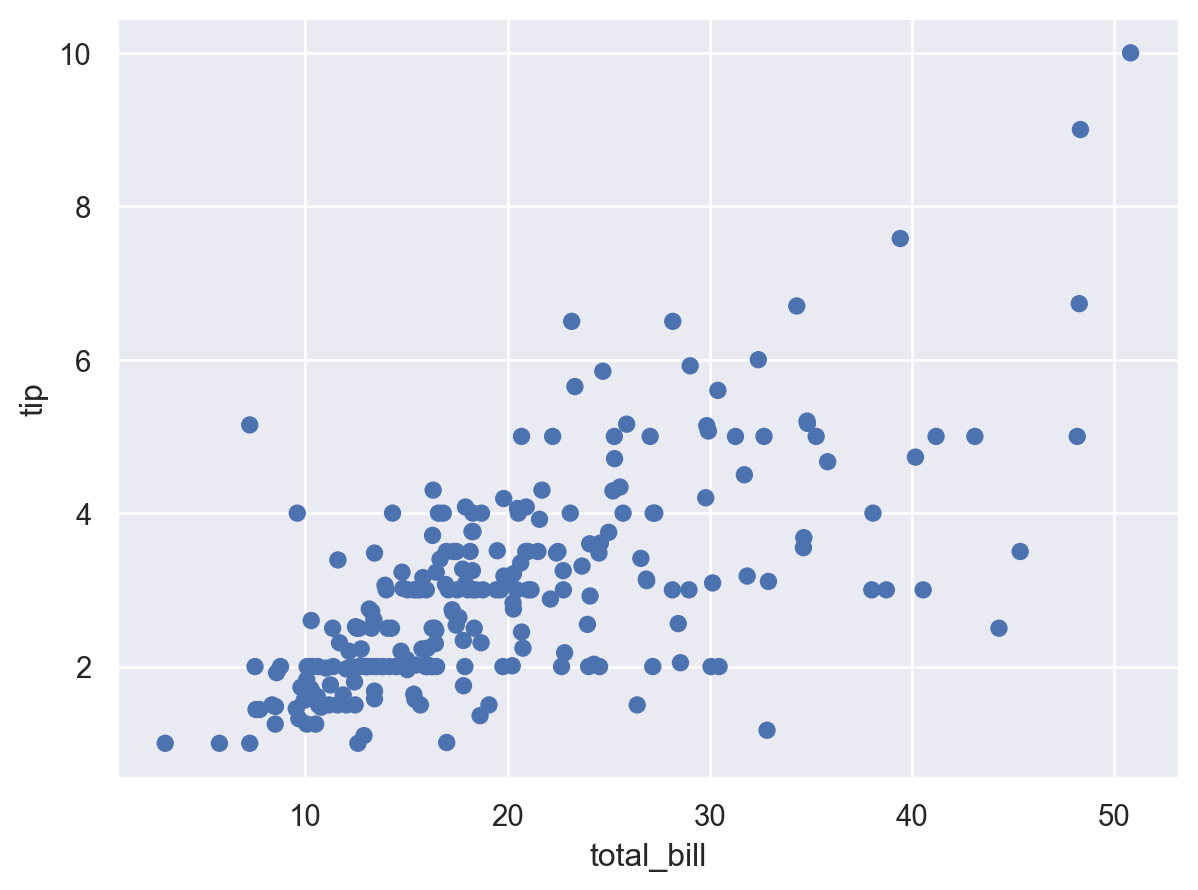

In [7]:
# Graficamos la relacion entre las variables 
(
    so.Plot(data=datos, x='total_bill', y='tip')
    .add(so.Dot())
)

Para visualizar la recta de la regresión, agregamos una línea al gráfico (`so.Line()`) junto a `so.PolyFit(1)`:

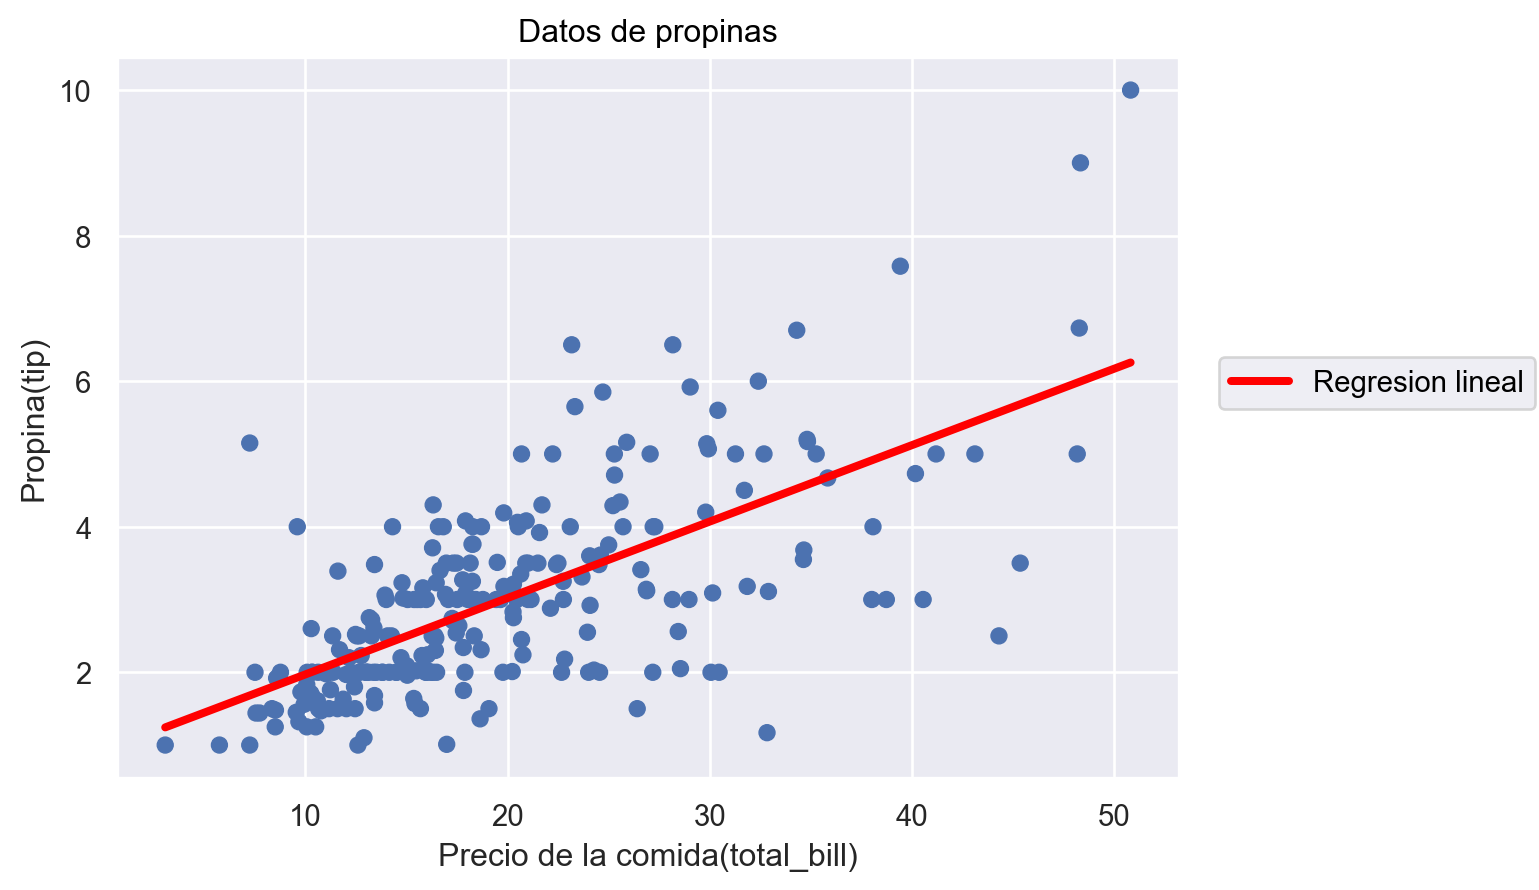

In [56]:
(
    so.Plot(data=datos, x='total_bill', y='tip')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label='Regresion lineal')    # Agregamos una etiqueta para la leyenda del grafico
    .label(title='Datos de propinas', x='Precio de la comida(total_bill)', y='Propina(tip)')    # Agregamos la leyenda, un titulo y le cambiamos el nombre a los ejes
)

### Cálculo de coeficientes y predicciones

Desafortunamente, `seaborn` no nos devuelve los valores de $\beta_0$ y $\beta_1$, que son importantes en la interpretación del resultado.

Hemos visto que podemos calcular los coeficientes de la regresión lineal como:

 $$
 \begin{array}{rl}
      \hat{\beta}_1 = & \dfrac{\displaystyle\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\displaystyle\sum_{i=1}^n(x_i - \bar{x})^2}  \\[1em]
      \hat{\beta}_0 = & \bar{y} - \hat{\beta}_1\bar{x}
 \end{array}
 $$

 pero también podemos utilizar `scikit-learn` y `formulaic`.

Como queremos predecir la propina según el precio de la comida usando una función lineal, la fórmula de Wilkinson es:
$$tip \sim total\_bill$$

In [57]:
# Obtenemos las matrices del modelo
y, X = Formula('tip ~ total_bill').get_model_matrix(datos)

df = pd.DataFrame(y)
df
# Inicializamos el modelo de regresión.
modelo = linear_model.LinearRegression(fit_intercept=False) # RECORDAR USAR fit_intercept = False

# Realiza el ajuste
modelo.fit(X, y)

# Para obtener los valores de beta_1 y beta_0 como valores numericos
beta = modelo.coef_
beta_0 = beta[0][0]
beta_1 = beta[0][1]
print('Beta_0: ', beta_0)
print('Beta_1: ', beta_1)

Beta_0:  0.9202696135546722
Beta_1:  0.10502451738435341


Entonces, la recta que mejor aproxima a los datos es (redondeando):
$$ Y = 0.92 + 0.105 X$$

Una interpretación que podemos darle a este resultado es que, por cada peso que costó la comida, se dejan de propina 0.105 pesos (o sea, alrededor de 10 centavos)

Con los valores de $\beta_0$ y $\beta_1$ podemos predecir cuanto será la propina según el valor de la comida. Supongamos que queremos predecir la propina que se deja por una cuenta \\$35. Utilizamos el método `predict()` del modelo.

<span style="color:red">**EL MÉTODO .predict() SOLO ADMITE ADMITE DATAFRAMES (O MATRICES).**</span>

In [19]:
# Creamos un array con los valores a predecir
x_a_predecir = np.array([30,20,45])

# Creamos un DataFrame con los valores de X para los que queremos predecir
# Debe tener una columna de 1's que sea el Intercept (término independiente)
dataframe_a_predecir = pd.DataFrame({'Intercept': np.ones(x_a_predecir.shape), 'total_bill': x_a_predecir})

# dataframe_a_predecir

# Aplicamos la fórmula del modelo
modelo.predict(dataframe_a_predecir)

array([[4.07100514],
       [3.02075996],
       [5.6463729 ]])

In [ ]:
# Para devolver directamente el numero agregamos .item()
modelo.predict(dataframe_a_predecir).tolist()

[[4.071005135085274], [3.0207599612417404], [5.6463728958505754]]

También podemos hacer directamente la cuenta porque ya sabemos cuanto valen $\beta_1$ y $\beta_0$:

In [28]:
beta_1 * 35 + beta_0

4.596127722007042

Podemos predecir varios valores de una:

In [29]:
# Creamos un array con los valores a predecir
x_a_predecir = np.array([35, 60])

# Creamos un DataFrame con los valores de X para los que queremos predecir
# Debe tener una columna de 1's que sea el Intercept (término independiente)
dataframe_a_predecir = pd.DataFrame({'Intercept': np.ones(x_a_predecir.shape), 'total_bill': x_a_predecir})

# Aplicamos la fórmula del modelo
modelo.predict(dataframe_a_predecir)

array([[4.59612772],
       [7.22174066]])

Si queremos calcular los valores predichos por el modelo $\hat{y}_i$ para todos nuestros $x_i$:

In [30]:
y_pred = modelo.predict(X)
display(y_pred)

array([[2.70463616],
       [2.00622312],
       [3.12683472],
       [3.40725019],
       [3.5028225 ],
       [3.57633966],
       [1.84133463],
       [3.74332864],
       [2.49983836],
       [2.47253198],
       [1.99887141],
       [4.6234341 ],
       [2.53974767],
       [2.85587147],
       [2.47778321],
       [3.1866987 ],
       [2.00517288],
       [2.631119  ],
       [2.70253567],
       [3.0890259 ],
       [2.80230897],
       [3.05121707],
       [2.57650625],
       [5.06033609],
       [3.00185555],
       [2.79075627],
       [2.32444741],
       [2.25303074],
       [3.19930164],
       [2.98400138],
       [1.92325375],
       [2.84746951],
       [2.50193885],
       [3.09322688],
       [2.78760553],
       [3.4471595 ],
       [2.63321949],
       [2.69833469],
       [2.88317784],
       [4.20438627],
       [2.60486287],
       [2.75399769],
       [2.38431139],
       [1.93690694],
       [4.11301494],
       [2.84116804],
       [3.25496464],
       [4.323

### ¿Qué tan bueno es el modelo?

Finalmente, el bueno de `scikit-learn` nos calcula el coeficiente de determinación $R^ 2$: primero van los datos observados ( $y$ ) y luego los datos predichos ( $\hat{y}$ )

In [55]:
y_pred = modelo.predict(X)
r2_score(datos['tip'], y_pred)

0.45661658635167657

De manera análoga podemos calcular el error cuadrático medio (ECM):

In [40]:
mean_squared_error(datos['tip'], y_pred)

1.036019442011377

Y la raíz del error cuadrático medio:

In [38]:
root_mean_squared_error(datos['tip'], y_pred)

1.0178504025697377

Esto último podría interpretarse (informalmente) como que al usar el modelo para predecir cuánta propina dejo, en
promedio voy a cometer un error en el margen de $\pm 1.01785$ pesos.